In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
! ls ../data/processed/classify-nn/0.11.0-202205220305
! cat ../data/processed/classify-nn/0.11.0-202205220305/metadata.json

classify.ckpt
embedding.ckpt
metadata.json
{
  "embedding_source": "data/intermediate/embedding/tile2vec-v5/version_10/checkpoints/epoch=2-step=5635.ckpt",
  "embedding_dim": 512,
  "created": "2022-05-21T21:00:20.860223"
}


In [7]:
from birdclef.models.classifier_nn.utils import predict, plot
from pathlib import Path
import json

train_audio = Path("../data/raw/birdclef-2022/train_audio")
classify_root = Path("../data/processed/classify-nn/0.11.0-202205220305")
filter_set = json.loads(Path("../data/raw/birdclef-2022/scored_birds.json").read_text())

pred, actual = predict(filter_set[0], train_audio, filter_set, classify_root)
pred.shape, actual.shape

STFT kernels created, time used = 0.1870 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds


((158, 22), (158, 22))

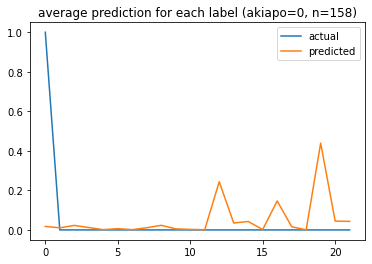

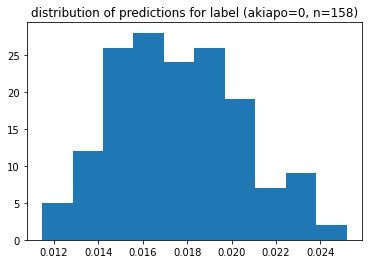

In [8]:
plot(filter_set[0], pred, actual)

akiapo
STFT kernels created, time used = 0.1830 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
entries:  (158, 22)


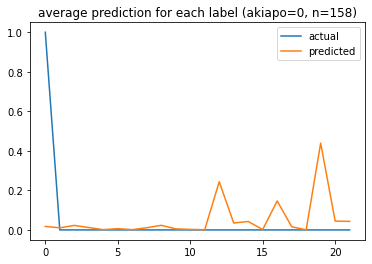

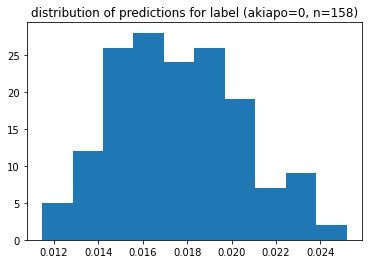

aniani
STFT kernels created, time used = 0.1820 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
entries:  (95, 22)


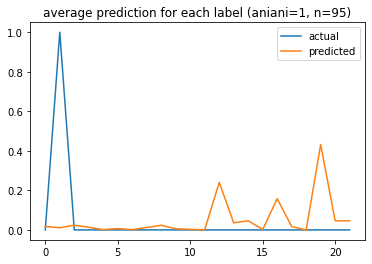

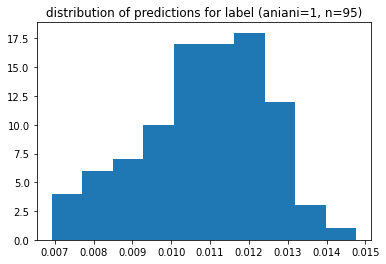

apapan
STFT kernels created, time used = 0.1830 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
entries:  (540, 22)


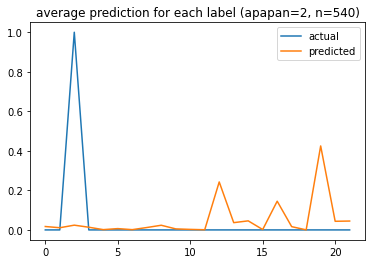

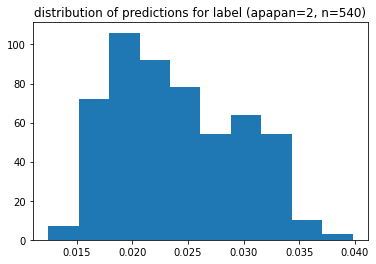

barpet
STFT kernels created, time used = 0.1860 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
entries:  (209, 22)


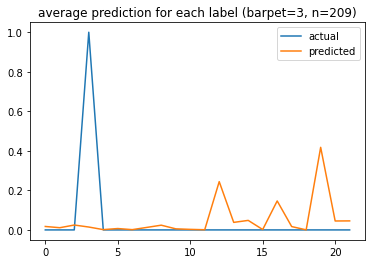

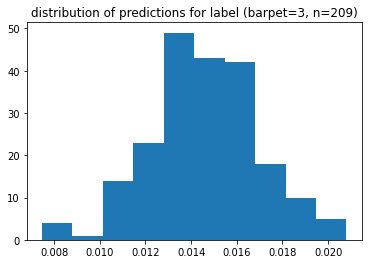

crehon
STFT kernels created, time used = 0.1810 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0040 seconds
entries:  (25, 22)


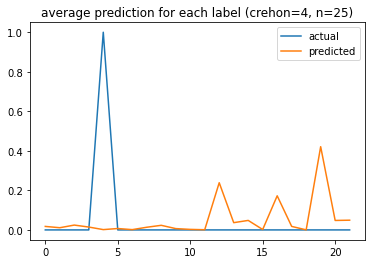

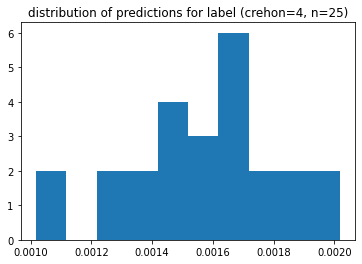

elepai
STFT kernels created, time used = 0.1840 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
entries:  (145, 22)


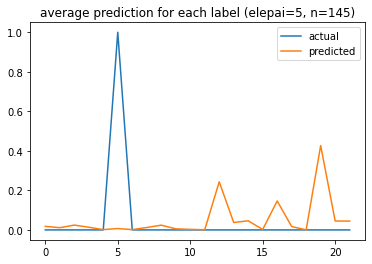

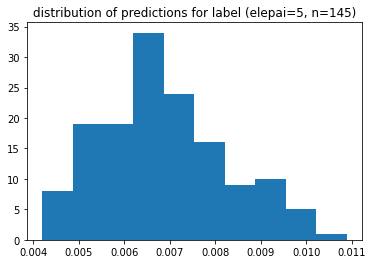

ercfra
STFT kernels created, time used = 0.1840 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
entries:  (16, 22)


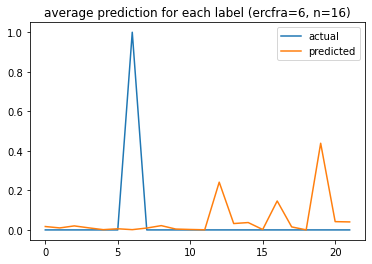

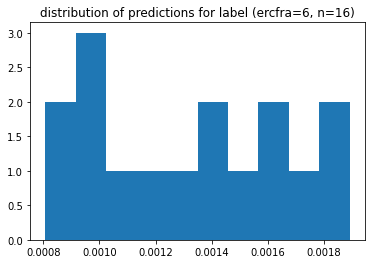

hawama
STFT kernels created, time used = 0.1860 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
entries:  (158, 22)


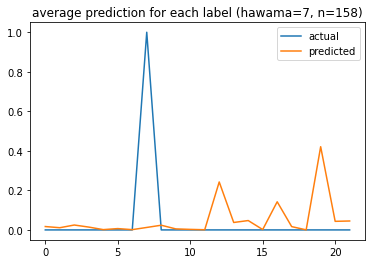

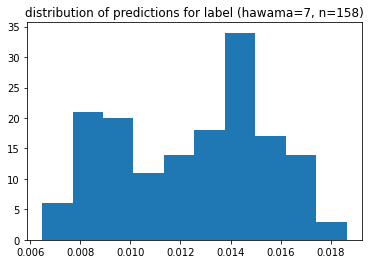

hawcre
STFT kernels created, time used = 0.1860 seconds
STFT filter created, time used = 0.0050 seconds
Mel filter created, time used = 0.0050 seconds
entries:  (504, 22)


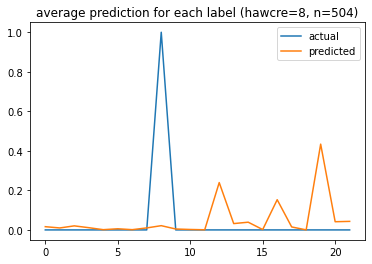

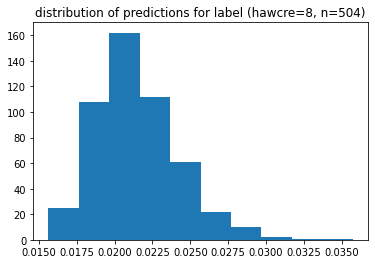

hawgoo
STFT kernels created, time used = 0.1830 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0050 seconds
entries:  (50, 22)


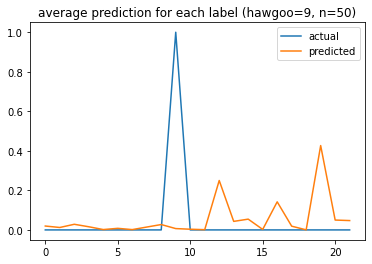

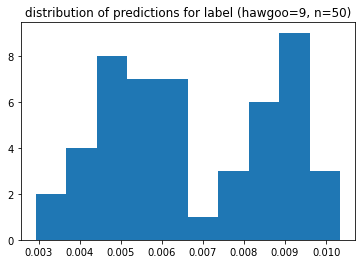

hawhaw
STFT kernels created, time used = 0.1910 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
entries:  (55, 22)


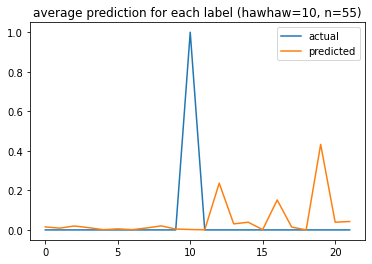

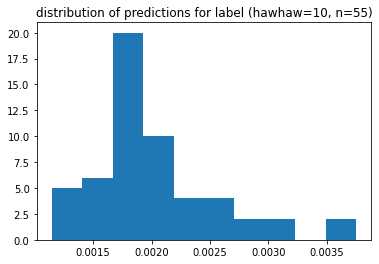

hawpet1
STFT kernels created, time used = 0.1970 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0040 seconds
entries:  (35, 22)


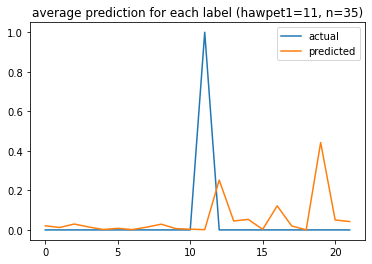

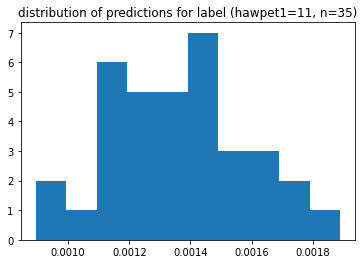

houfin
STFT kernels created, time used = 0.1860 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
entries:  (3571, 22)


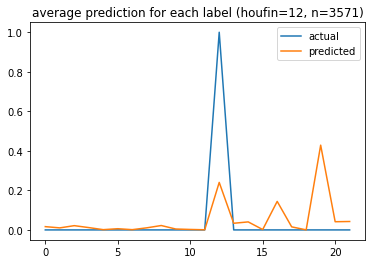

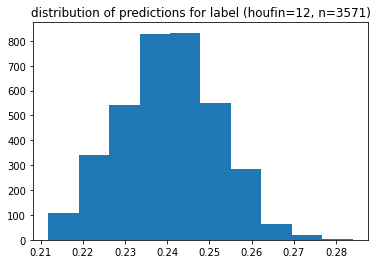

iiwi
STFT kernels created, time used = 0.1840 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
entries:  (454, 22)


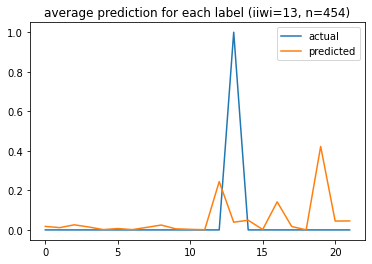

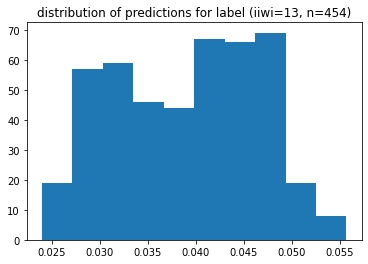

jabwar
STFT kernels created, time used = 0.1810 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
entries:  (878, 22)


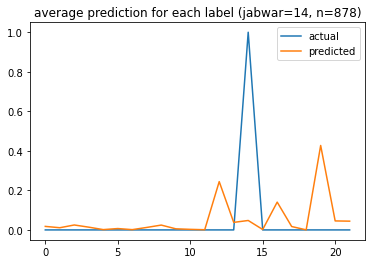

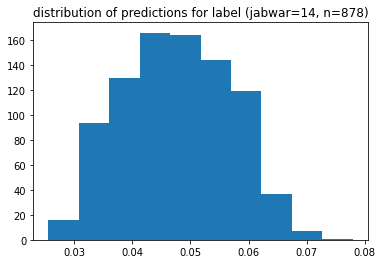

maupar
STFT kernels created, time used = 0.1820 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
entries:  (50, 22)


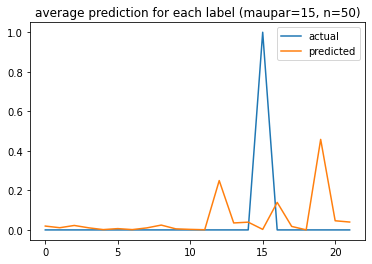

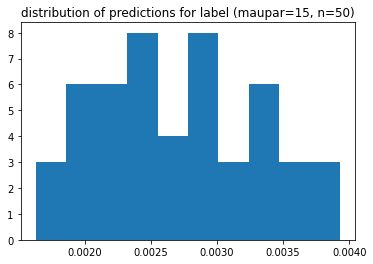

omao
STFT kernels created, time used = 0.1850 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
entries:  (244, 22)


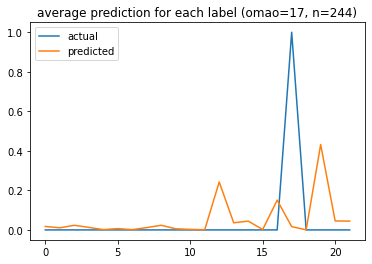

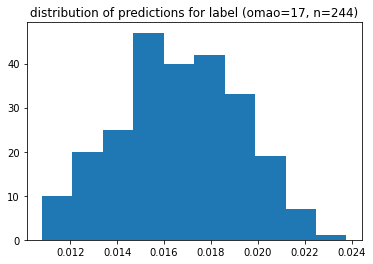

puaioh
STFT kernels created, time used = 0.1870 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
entries:  (9, 22)


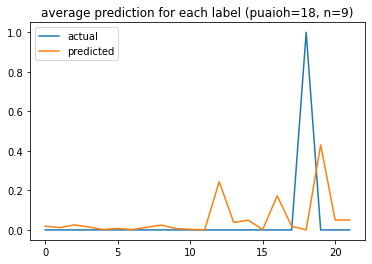

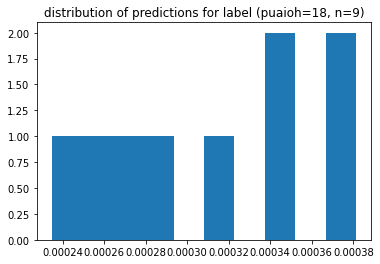

skylar
STFT kernels created, time used = 0.1840 seconds
STFT filter created, time used = 0.0050 seconds
Mel filter created, time used = 0.0050 seconds
entries:  (5796, 22)


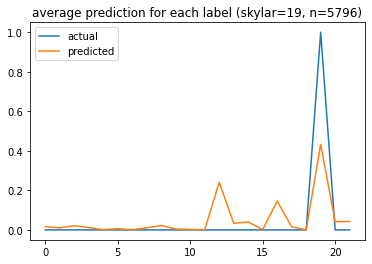

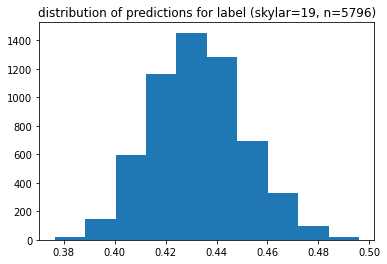

warwhe1
STFT kernels created, time used = 0.1820 seconds
STFT filter created, time used = 0.0030 seconds
Mel filter created, time used = 0.0030 seconds
entries:  (568, 22)


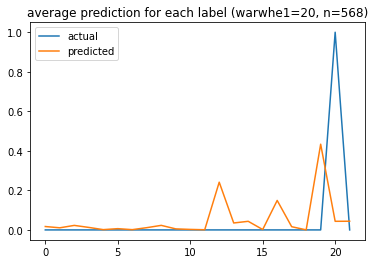

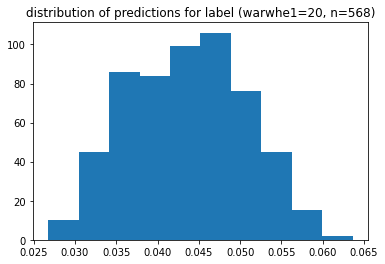

yefcan
STFT kernels created, time used = 0.1830 seconds
STFT filter created, time used = 0.0040 seconds
Mel filter created, time used = 0.0040 seconds
entries:  (494, 22)


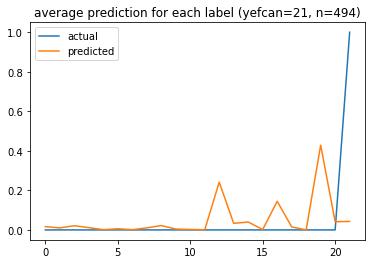

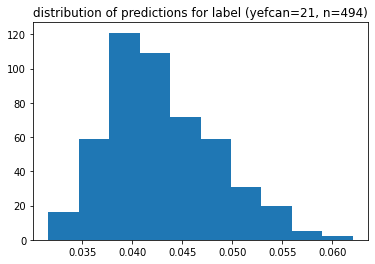

In [9]:
for bird in filter_set:
    print(bird)
    pred, actual = predict(bird, train_audio, filter_set, classify_root)
    print("entries: ", pred.shape)
    plot(bird, pred, actual)